In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.io import fits
from scipy.optimize import curve_fit
from clevar.match import output_matched_catalog
from clevar.catalog import ClCatalog

In [2]:
inpath = "/sps/lsst/groups/clusters/amico_validation_project/catalogs/"
rm_inpath = '/sps/lsst/users/tguillem/DESC/desc_april_2022/cluster_challenge/clevar_catalogs/redmapper/full_pmem_small/cosmoDC2_v1.1.4_redmapper_v0.8.1/'

In [13]:
am_path = inpath+'amico_cats/new_amico_map_associations_cut/Catalog.fits'
rm_path = rm_inpath + 'Catalog.fits'
rm_path_mb = rm_inpath + 'Catalog_members.fits'

In [14]:
am = Table.read(am_path)
rm = Table.read(rm_path)
rm_mb = Table.read(rm_path_mb)

In [15]:
rm

id,ra,dec,z,mass,z_true,log_mass
int32,float64,float64,float32,float32,float32,float64
26,67.04118044229672,-36.65553761954279,0.9107078,140.76186,0.90100455,2.148484945297241
54,68.58519520148329,-37.06286568615487,0.54123485,117.284454,0.5372703,2.0692405700683594
93,66.52163526817355,-40.49730464002901,0.5698791,106.65174,0.57118505,2.027967929840088
98,64.25941267918058,-34.47274791810462,0.315754,104.317726,0.32086432,2.0183582305908203
113,63.75410748565172,-34.54380191569124,0.4213185,102.05999,0.41989592,2.0088555812835693
115,64.1372095102839,-34.69241881139706,0.56447726,90.03907,0.566998,1.9544310569763184
137,67.80839610127185,-36.94773176218435,0.6999187,95.69867,0.69295466,1.9809058904647827
211,65.13958203133247,-37.308310355463625,0.78099364,75.485825,0.78915185,1.8778654336929321
223,66.73154921872963,-40.35328887737074,0.8703075,73.41115,0.87859684,1.8657619953155518


In [19]:
z_l = []
for id in rm['id']:
    n = len(rm_mb[rm_mb['id_cluster']==id])
    for i in range(n):
        z_l.append(rm[rm['id']==id]['z'])


In [42]:
z_ll=[]
for i in range(len(z_l)):
    z_ll.append(z_l[i][0])

In [48]:
rm_mb['z'] = z_ll    

In [49]:
rm_mb

id,id_cluster,ra,dec,pmem,mag_r,mag_i,mag_z,z
int64,int32,float64,float64,float32,float32,float32,float32,float32
8064212696,26,67.04118044229672,-36.65553761954279,0.99921656,21.258728,20.214851,19.428509,0.9107078
8064240727,26,67.03971963378734,-36.65522571193022,0.99659103,23.312243,22.278286,21.518162,0.9107078
8064212769,26,67.0415493650172,-36.65687792864976,0.9989721,22.716715,21.634148,20.81336,0.9107078
8064240664,26,67.04093102342418,-36.65698236318693,0.99861884,23.124426,22.082472,21.257294,0.9107078
8064240703,26,67.0412281651421,-36.65717961161655,0.99695486,23.376398,22.281954,21.472717,0.9107078
8064240699,26,67.03983980902925,-36.65398719537674,0.9703774,23.295563,22.234524,21.610706,0.9107078
8064240721,26,67.04364312566005,-36.655242414144816,0.9978006,23.18554,22.158426,21.370802,0.9107078
8064240717,26,67.03912052150015,-36.65679793512189,0.9394761,23.624811,22.641552,21.84039,0.9107078
8064240657,26,67.04217981617906,-36.65324525966428,0.969031,23.6376,22.695902,21.918003,0.9107078


In [97]:
z_min, z_max = 1, 1.15

In [98]:
delt = rm_mb[(rm_mb['z']>z_min)*(rm_mb['z']<z_max)]['mag_r'] - rm_mb[(rm_mb['z']>z_min)*(rm_mb['z']<z_max)]['mag_i']

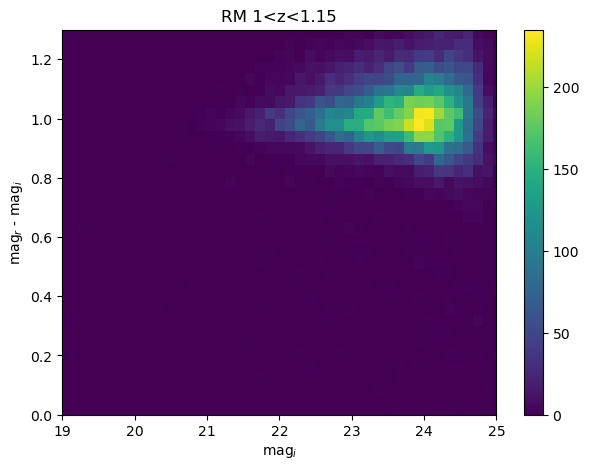

In [99]:
plt.figure(figsize = (7,5))
plt.hist2d(rm_mb[(rm_mb['z']>z_min)*(rm_mb['z']<z_max)]['mag_i'], delt, bins = 50, vmin=0)
plt.colorbar()
plt.ylim([0,1.3])
plt.xlim([19,25])
plt.xlabel('mag$_i$')
plt.ylabel('mag$_r$ - mag$_i$')
plt.title('RM ' + str(z_min) + '<z<' + str(z_max))
plt.show()